#### Redes Neurais
##### Etapas
     - Carregando as bibliotecas
     - Carregando as bases de dados
     - Visualização dos dados
     - Construção do alvo
     - Treinamento do model
     - Avaliação dos resultados
     - Tratamento dos resultados
     - Re-treinamento do modelo
     - Re-avaliação do modelo
     - Auto test
     - Salvando o modelo para o uso futuro com pickle
#### Arquivos podem ser baixados [Aqui](https://www.kaggle.com/c/digit-recognizer)

#### Importando as bibliotecas!

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter('ignore')

#### Carregando a base de dados

In [42]:
train = pd.read_csv('mnist_train.csv', sep=',', header=None)
test= pd.read_csv('mnist_test.csv', sep=',', header=None)

In [43]:
train.shape

(60000, 785)

In [44]:
train.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            775, 776, 777, 778, 779, 780, 781, 782, 783, 784],
           dtype='int64', length=785)

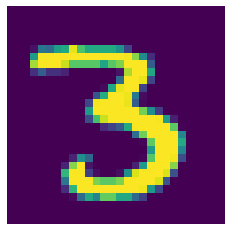

In [48]:
number = train.iloc[12][1:train.shape[1]]
number_matrix = number.values.reshape(28,28)
plt.imshow(number_matrix)
plt.axis('off');

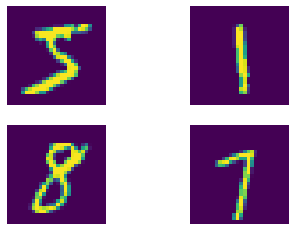

In [49]:
number = train.iloc[0][1:]
number_matrix =number.values.reshape(28,28)
plt.subplot(221)
plt.imshow(number_matrix)
plt.axis('off');
number = train.iloc[8][1:]
number_matrix =number.values.reshape(28,28)
plt.subplot(222)
plt.imshow(number_matrix)
plt.axis('off');
number = train.iloc[85][1:]
number_matrix =number.values.reshape(28,28)
plt.subplot(223)
plt.imshow(number_matrix)
plt.axis('off');
number = train.iloc[42][1:]
number_matrix =number.values.reshape(28,28)
plt.subplot(224)
plt.imshow(number_matrix)
plt.axis('off');

In [50]:
#Separando os dados de treino e teste em x e y
y_train = train.iloc[0:][0]
y_test = test.iloc[0:][0]

x_train = train.ix[:,1:]
x_test = test.ix[:,1:]

**Treinamento do modelo**

In [51]:
mlp1 = MLPClassifier(hidden_layer_sizes =(50), max_iter = 150, solver='sgd', verbose = 10, tol = 1e-4, random_state=42,
                    learning_rate_init=0.1, activation='logistic')
mlp1.fit(x_train,y_train)

Iteration 1, loss = 1.15432784
Iteration 2, loss = 1.14906421
Iteration 3, loss = 1.08979878
Iteration 4, loss = 1.10766495
Iteration 5, loss = 1.13644392
Iteration 6, loss = 1.00334137
Iteration 7, loss = 1.05167171
Iteration 8, loss = 1.01105161
Iteration 9, loss = 1.01840839
Iteration 10, loss = 1.02912527
Iteration 11, loss = 0.98881480
Iteration 12, loss = 0.94192029
Iteration 13, loss = 0.88954251
Iteration 14, loss = 0.91068497
Iteration 15, loss = 0.90827545
Iteration 16, loss = 0.89854651
Iteration 17, loss = 0.90909240
Iteration 18, loss = 0.89082215
Iteration 19, loss = 0.89067268
Iteration 20, loss = 0.94124863
Iteration 21, loss = 0.92549755
Iteration 22, loss = 0.90115072
Iteration 23, loss = 0.80467931
Iteration 24, loss = 0.80042095
Iteration 25, loss = 0.80837307
Iteration 26, loss = 0.82376584
Iteration 27, loss = 0.86362992
Iteration 28, loss = 0.91650116
Iteration 29, loss = 0.88648698
Iteration 30, loss = 0.84848371
Iteration 31, loss = 0.84630313
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=50,
              learning_rate_init=0.1, max_iter=150, random_state=42,
              solver='sgd', verbose=10)

In [53]:
y_pred_test1 = mlp1.predict(x_test)

**Avaliação dos resultados**

In [56]:
print(confusion_matrix(y_test,y_pred_test1))
print('\n--------------------------------------------\n')
print(classification_report(y_test,y_pred_test1))

[[896   0   4   3   0  48   7   0   9  13]
 [  0 996  78   8   0   1   3   5  44   0]
 [ 31  26 767  42  31   4  55  46  14  16]
 [ 16  16  44 580   1 229   2  47  66   9]
 [  1   3  22   6 381   0 105   5 251 208]
 [ 57   6  11  78  30 494  68  19 120   9]
 [ 42   4 100   1  28   4 761   0   3  15]
 [ 13  11  39   7   3   3   2 773   9 168]
 [ 10  23   1   8  11  68  24  57 643 129]
 [  7   1  13   9  28  14   7 190 137 603]]

--------------------------------------------

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       980
           1       0.92      0.88      0.90      1135
           2       0.71      0.74      0.73      1032
           3       0.78      0.57      0.66      1010
           4       0.74      0.39      0.51       982
           5       0.57      0.55      0.56       892
           6       0.74      0.79      0.76       958
           7       0.68      0.75      0.71      1028
           8       0.50      0.66  

In [57]:
print("Acc. treinamento", mlp1.score(x_train, y_train))
print('Acc. teste', mlp1.score(x_test,y_test))

Acc. treinamento 0.6852833333333334
Acc. teste 0.6894


**Tratamento dos dados**

In [58]:
fator = 0.98/255
min_val = 0.01

In [59]:
x_train1 = x_train*fator + min_val
x_test1 = x_test*fator + min_val

**Retreinamento do modelo**

In [61]:
mlp2 = MLPClassifier(hidden_layer_sizes =(50), max_iter = 150, solver='sgd', verbose = 10, tol = 1e-4, random_state=42,
                    learning_rate_init=0.1, activation='logistic')
mlp2.fit(x_train1,y_train)

Iteration 1, loss = 0.58492639
Iteration 2, loss = 0.26385720
Iteration 3, loss = 0.21495828
Iteration 4, loss = 0.18227532
Iteration 5, loss = 0.15930053
Iteration 6, loss = 0.14165326
Iteration 7, loss = 0.12887018
Iteration 8, loss = 0.11798395
Iteration 9, loss = 0.10924618
Iteration 10, loss = 0.10151903
Iteration 11, loss = 0.09503113
Iteration 12, loss = 0.08983487
Iteration 13, loss = 0.08482787
Iteration 14, loss = 0.08067506
Iteration 15, loss = 0.07662273
Iteration 16, loss = 0.07306460
Iteration 17, loss = 0.06960983
Iteration 18, loss = 0.06681942
Iteration 19, loss = 0.06404990
Iteration 20, loss = 0.06164352
Iteration 21, loss = 0.05920851
Iteration 22, loss = 0.05711106
Iteration 23, loss = 0.05483017
Iteration 24, loss = 0.05305846
Iteration 25, loss = 0.05141709
Iteration 26, loss = 0.04953903
Iteration 27, loss = 0.04777916
Iteration 28, loss = 0.04616530
Iteration 29, loss = 0.04464088
Iteration 30, loss = 0.04331732
Iteration 31, loss = 0.04185369
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=50,
              learning_rate_init=0.1, max_iter=150, random_state=42,
              solver='sgd', verbose=10)

In [62]:
y_pred_test1 = mlp2.predict(x_test1)

**Avaliação dos resultados**

In [63]:
print(confusion_matrix(y_test,y_pred_test1))
print('\n--------------------------------------------\n')
print(classification_report(y_test,y_pred_test1))

[[ 966    0    3    1    1    2    2    1    3    1]
 [   0 1121    2    1    0    1    4    1    5    0]
 [   5    2 1002    2    6    1    4    5    5    0]
 [   0    0    4  986    0    4    0    6    7    3]
 [   1    1    6    1  954    0    2    2    3   12]
 [   3    0    0   18    2  855    3    3    7    1]
 [   5    2    3    2    3    5  933    1    4    0]
 [   2    3    8    6    0    1    0 1000    1    7]
 [   5    1    6    4    1    4    2    5  944    2]
 [   1    4    0    8    8    3    1    6    2  976]]

--------------------------------------------

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.97      0.98

In [64]:
print("Acc. treinamento", mlp2.score(x_train1, y_train))
print('Acc. teste', mlp2.score(x_test1,y_test))

Acc. treinamento 0.99985
Acc. teste 0.9737


In [65]:
from PIL import Image

In [67]:
numero = np.array(Image.open('numero.bmp'))
numero.shape

(28, 28)

In [68]:
#Converte a matrix para 1D-array
numero = numero.ravel()

In [69]:
numero.shape

(784,)

In [70]:
numero  = np.where(numero == True,0,1)
numero = numero.reshape(1,-1)

(-0.5, 27.5, 27.5, -0.5)

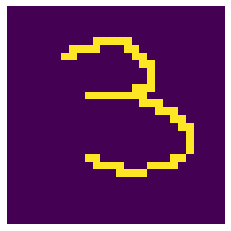

In [71]:
number_matrix = numero.reshape(28,28)
plt.imshow(number_matrix)
plt.axis('off');

In [72]:
def identificar_num(modelo,imagem):
    numero = np.array(Image.open(imagem))
    numero = np.where(numero==True,0,1)
    numero = numero.reshape(1,-1)
    number_matrix = numero.reshape(28,28)
    plt.imshow(number_matrix)
    plt.axis('off');
    print("Numero previsto",modelo.predict(numero))
    print("Numero real:")

Numero previsto [3]
Numero real:


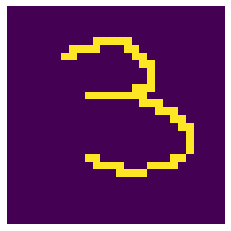

In [73]:
identificar_num(mlp2,"numero.bmp")

In [74]:
import pickle

In [76]:
#salvando o modelo 
filename = 'digit_NT.sav'
pickle.dump(mlp2,open(filename,'wb'))

In [ ]:
#Quando quiser carregar novamente
#filename = 'digit_NT.sav'
#modelo = pickle.load(open(filename,'rb'))
#previsao = modelo.predict(x_test1)
